Generating ultrasonic sensor data...

Dataset Info:
   num_interruptions  avg_distance  min_distance  interruption_rate  \
0                 12    177.515218    177.969100           0.179055   
1                 10    279.926422    160.111501           0.212422   
2                 64     36.987129     19.091248           0.632532   
3                 21     82.306243     81.981973           0.389951   
4                 49     56.485599     49.258798           0.639853   
5                 12    165.994041     94.424603           0.407675   
6                 48     84.671788     25.230688           0.593952   
7                 16    140.999666    106.655593           0.310678   
8                  3    196.756661    152.006802           0.164013   
9                 78     95.159915     54.741368           0.819055   

     variance  congestion_level  
0   27.833310                 0  
1   10.823380                 0  
2  101.296957                 2  
3   42.799940                 

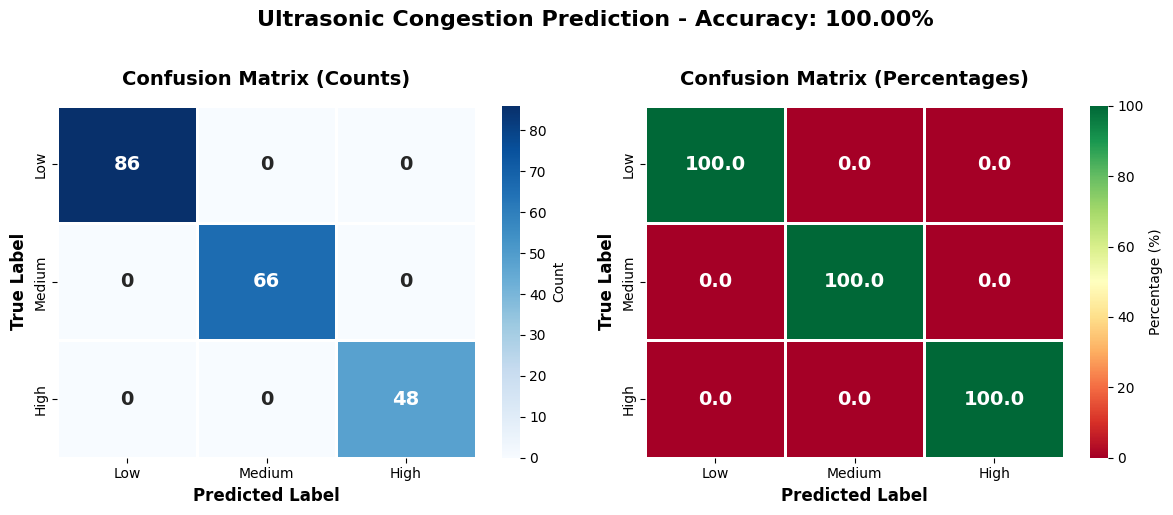


Feature Importance:
             feature  importance
3  interruption_rate    0.326348
0  num_interruptions    0.283741
4           variance    0.198511
1       avg_distance    0.110473
2       min_distance    0.080927

EXAMPLE PREDICTIONS

Prediction for 5 interruptions:
Congestion Level: Medium
Probabilities - Low: 14.00%, Medium: 86.00%, High: 0.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction for 25 interruptions:
Congestion Level: Medium
Probabilities - Low: 0.00%, Medium: 100.00%, High: 0.00%

Prediction for 60 interruptions:
Congestion Level: High
Probabilities - Low: 0.00%, Medium: 23.00%, High: 77.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


✓ Feature importance plot saved as 'feature_importance.png'


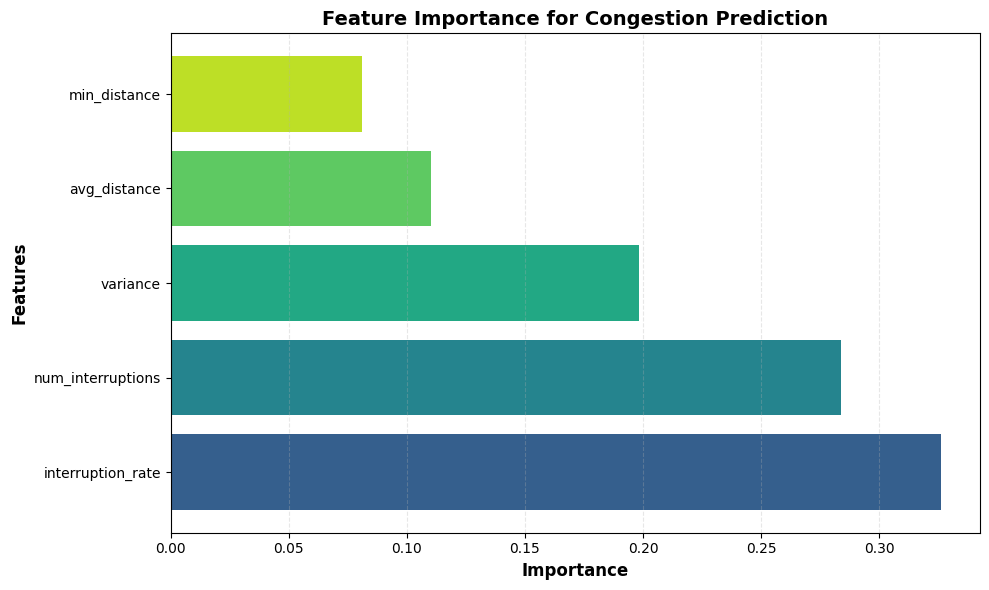


Model training complete!


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic ultrasonic sensor data
def generate_ultrasonic_data(n_samples=1000):
    """
    Generate synthetic data simulating ultrasonic distance measurements
    Features:
    - num_interruptions: number of distance interruptions detected
    - avg_distance: average distance measured
    - min_distance: minimum distance recorded
    - interruption_rate: interruptions per time unit
    - variance: variance in distance measurements

    Congestion levels: 0=Low, 1=Medium, 2=High
    """
    np.random.seed(42)
    data = []

    for _ in range(n_samples):
        # Simulate different congestion scenarios
        congestion = np.random.choice([0, 1, 2], p=[0.4, 0.35, 0.25])

        if congestion == 0:  # Low congestion
            num_interruptions = np.random.randint(0, 15)
            avg_distance = np.random.uniform(150, 300)
            min_distance = np.random.uniform(100, 200)
            interruption_rate = np.random.uniform(0, 0.3)
            variance = np.random.uniform(10, 50)

        elif congestion == 1:  # Medium congestion
            num_interruptions = np.random.randint(10, 40)
            avg_distance = np.random.uniform(80, 180)
            min_distance = np.random.uniform(40, 120)
            interruption_rate = np.random.uniform(0.25, 0.6)
            variance = np.random.uniform(40, 100)

        else:  # High congestion
            num_interruptions = np.random.randint(35, 100)
            avg_distance = np.random.uniform(20, 100)
            min_distance = np.random.uniform(10, 60)
            interruption_rate = np.random.uniform(0.55, 1.0)
            variance = np.random.uniform(80, 150)

        data.append([num_interruptions, avg_distance, min_distance,
                    interruption_rate, variance, congestion])

    return pd.DataFrame(data, columns=['num_interruptions', 'avg_distance',
                                       'min_distance', 'interruption_rate',
                                       'variance', 'congestion_level'])

# Generate dataset
print("Generating ultrasonic sensor data...")
df = generate_ultrasonic_data(1000)

print("\nDataset Info:")
print(df.head(10))
print("\nCongestion Distribution:")
print(df['congestion_level'].value_counts().sort_index())

# Prepare features and target
X = df.drop('congestion_level', axis=1)
y = df['congestion_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
print("\nTraining Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Low', 'Medium', 'High']))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Create colored confusion matrix visualization
plt.figure(figsize=(12, 5))

# Subplot 1: Confusion Matrix with counts
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')

# Subplot 2: Confusion Matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
plt.subplot(1, 2, 2)
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='RdYlGn',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'},
            vmin=0, vmax=100)
plt.title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')

plt.suptitle(f'Ultrasonic Congestion Prediction - Accuracy: {accuracy_score(y_test, y_pred):.2%}',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_colored.png', dpi=300, bbox_inches='tight')
print("\n✓ Colored confusion matrix saved as 'confusion_matrix_colored.png'")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Example prediction function
def predict_congestion(num_interruptions, avg_distance=100, min_distance=50,
                      interruption_rate=0.5, variance=50):
    """Predict congestion level from ultrasonic sensor data"""
    features = np.array([[num_interruptions, avg_distance, min_distance,
                         interruption_rate, variance]])
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)[0]
    probabilities = model.predict_proba(features_scaled)[0]

    levels = ['Low', 'Medium', 'High']
    print(f"\nPrediction for {num_interruptions} interruptions:")
    print(f"Congestion Level: {levels[prediction]}")
    print(f"Probabilities - Low: {probabilities[0]:.2%}, "
          f"Medium: {probabilities[1]:.2%}, High: {probabilities[2]:.2%}")
    return prediction

# Test predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)
predict_congestion(5)   # Low congestion scenario
predict_congestion(25)  # Medium congestion scenario
predict_congestion(60)  # High congestion scenario

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance for Congestion Prediction', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("✓ Feature importance plot saved as 'feature_importance.png'")
plt.show()

print("\n" + "="*50)
print("Model training complete!")
print("="*50)